 This project will test your data science abilities as well as Machine learning modeling abilities 

● you will find the dataset which is related to DDoS Attacks byfollowing  this link
(https://www.kaggle.com/siddharthm1698/ddos-botnet-attack-on-iot-devices?select=DDoSdata.csv)
Download this data 

● The data is highly undistributed 

● Convert every attribute data type into float data type so attributes require
one hot encoding (label encoder) 

● You need to apply correlation and variance concepts so that you will take only important columns
into consideration 

● Use this data for modeling 
o Create 
Logistic regression 
Random Forest 
Decision Tree 

Note : Accuracy should be above 90%●


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("DDoSdata.csv")

C:\Users\Jayraj\AppData\Local\Temp\ipykernel_24036\2689863583.py:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("DDoSdata.csv")


In [3]:
df.head()

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


In [4]:
df = df.sample(frac=0.7, random_state=50) # due to dataset is very large we remove 30% of data 

In [5]:
df

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
808103,2458365,2458364,1.528096e+09,e s,2,tcp,1,192.168.100.148,49227,192.168.100.3,...,0.152380,100,83,0.157517,0.152380,498,498,1,DDoS,TCP
836268,2486530,2486529,1.528096e+09,e s,2,tcp,1,192.168.100.147,62172,192.168.100.3,...,0.080677,100,40,0.089034,0.080677,300,120,1,DDoS,TCP
787644,2437906,2437905,1.528096e+09,e s,2,tcp,1,192.168.100.149,27266,192.168.100.3,...,0.222076,100,100,0.194804,0.222076,912,912,1,DDoS,TCP
884846,2535108,2535107,1.528096e+09,e s,2,tcp,1,192.168.100.148,945,192.168.100.3,...,0.130212,100,68,0.144923,0.130212,288,96,1,DDoS,TCP
14738,1664999,1664999,1.528096e+09,e g,5,tcp,1,192.168.100.148,5969,192.168.100.3,...,0.530834,100,61,0.612178,0.530834,496,366,1,DDoS,TCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617408,3267671,3267669,1.528099e+09,e,1,udp,3,192.168.100.147,28178,192.168.100.3,...,1.074450,100,100,1.074400,1.074450,1500,1500,1,DDoS,UDP
1797508,3447771,3447769,1.528099e+09,e,1,udp,3,192.168.100.148,38762,192.168.100.3,...,0.800111,100,100,0.800111,0.800111,1100,1100,1,DDoS,UDP
1374094,3024357,3024355,1.528099e+09,e,1,udp,3,192.168.100.147,18652,192.168.100.3,...,1.098020,100,100,1.098030,1.098020,1500,1500,1,DDoS,UDP
1662645,3312908,3312906,1.528099e+09,e,1,udp,3,192.168.100.148,6256,192.168.100.3,...,0.752585,100,100,0.724973,0.752585,1035,1035,1,DDoS,UDP


In [6]:
df.isnull().sum()             # no need to handle any null value 

Unnamed: 0                          0
pkSeqID                             0
stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes      

In [ ]:
# taking obj column for traeting 

In [7]:
# Get the names of columns that are of type object
object_col = list(df.select_dtypes(include=['object']).columns) 

In [8]:
object_col

['flgs',
 'proto',
 'saddr',
 'sport',
 'daddr',
 'dport',
 'state',
 'category',
 'subcategory']

● Convert every attribute data type into float data type so attributes require
one hot encoding (label encoder) 

In [ ]:
# treating  all object col in loop for converting labelencoder 

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Convert all object columns into string type
df[object_col] = df[object_col].astype(str)


In [11]:
# Apply label encoder to each column
for col in object_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [12]:
df.head()

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
808103,2458365,2458364,1.528096e+09,5,2,3,1,2,43590,16,...,0.152380,100,83,0.157517,0.152380,498,498,1,0,2
836268,2486530,2486529,1.528096e+09,5,2,3,1,1,57974,16,...,0.080677,100,40,0.089034,0.080677,300,120,1,0,2
787644,2437906,2437905,1.528096e+09,5,2,3,1,3,19189,16,...,0.222076,100,100,0.194804,0.222076,912,912,1,0,2
884846,2535108,2535107,1.528096e+09,5,2,3,1,2,64928,16,...,0.130212,100,68,0.144923,0.130212,288,96,1,0,2
14738,1664999,1664999,1.528096e+09,4,5,3,1,2,55214,16,...,0.530834,100,61,0.612178,0.530834,496,366,1,0,2


In [ ]:
# df.info()

In [13]:
# convert datatype into flot
df = df.astype(float)  


In [14]:
import klib 

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Note: The number of non binary numerical features is very large (45), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<AxesSubplot:xlabel='stddev', ylabel='Density'>

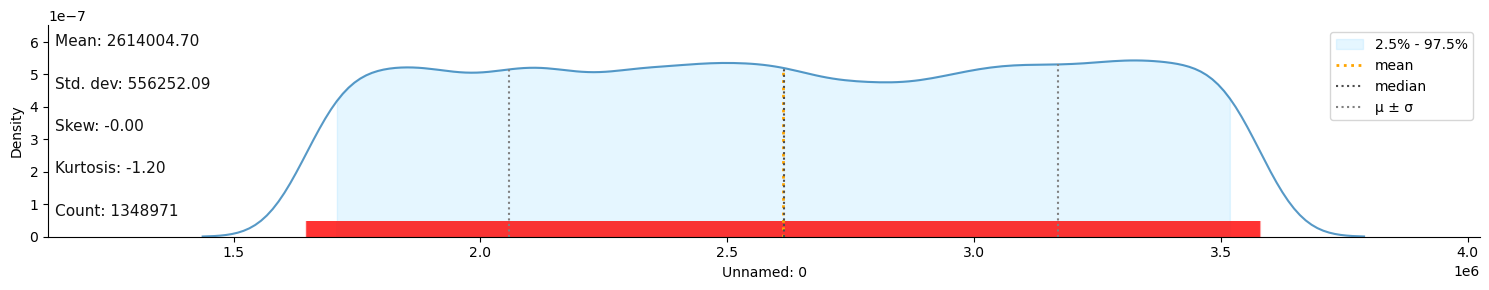

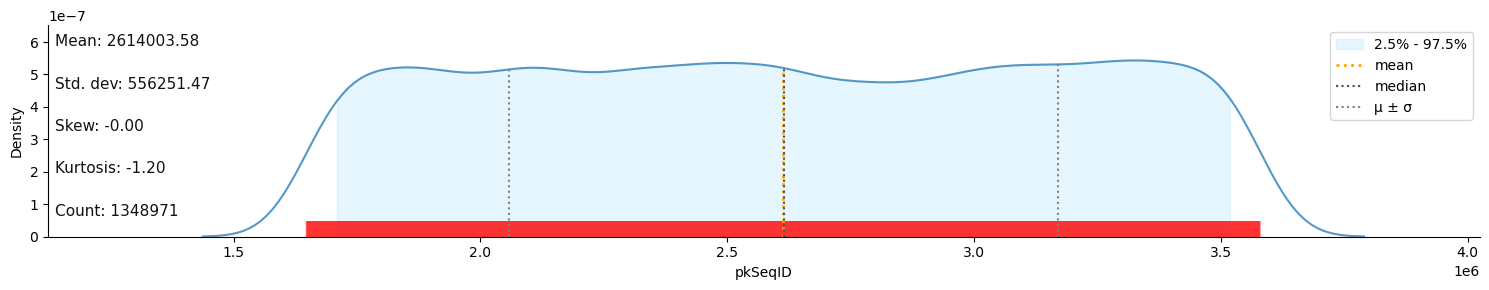

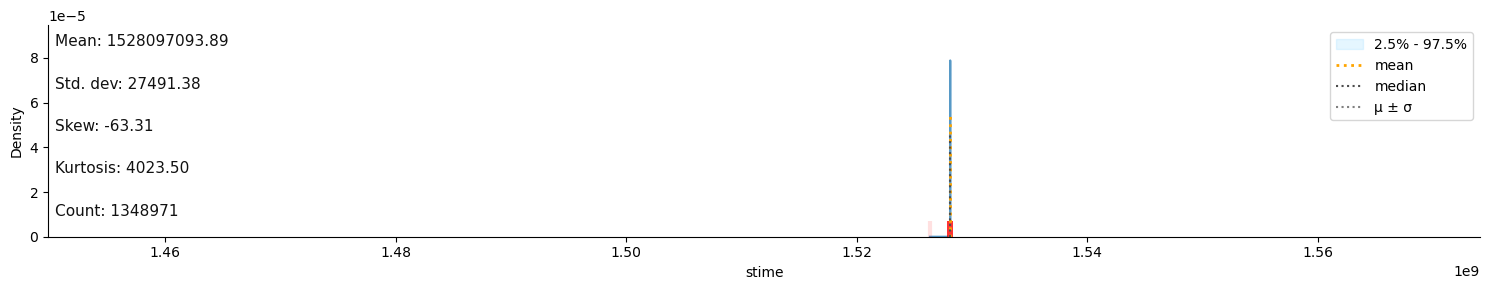

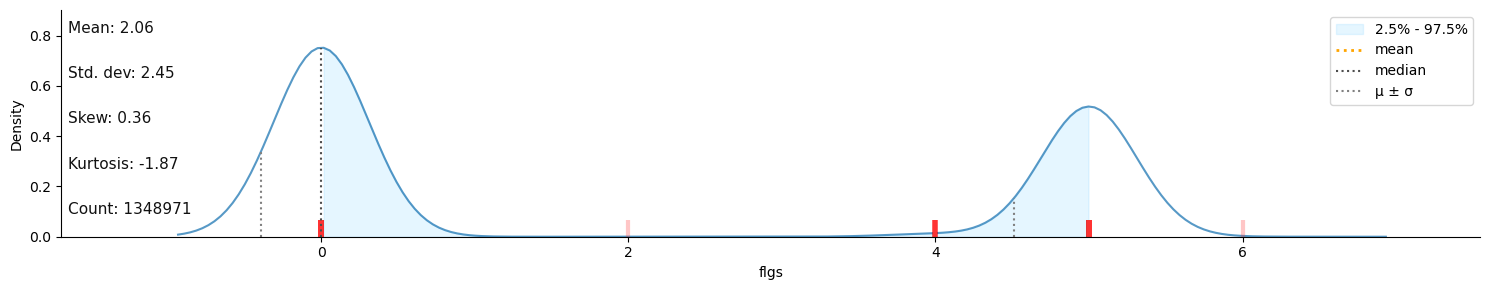

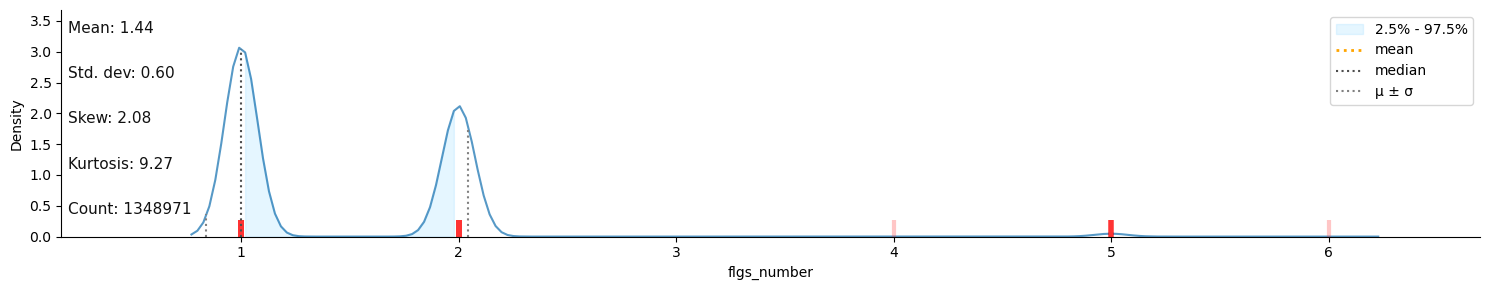

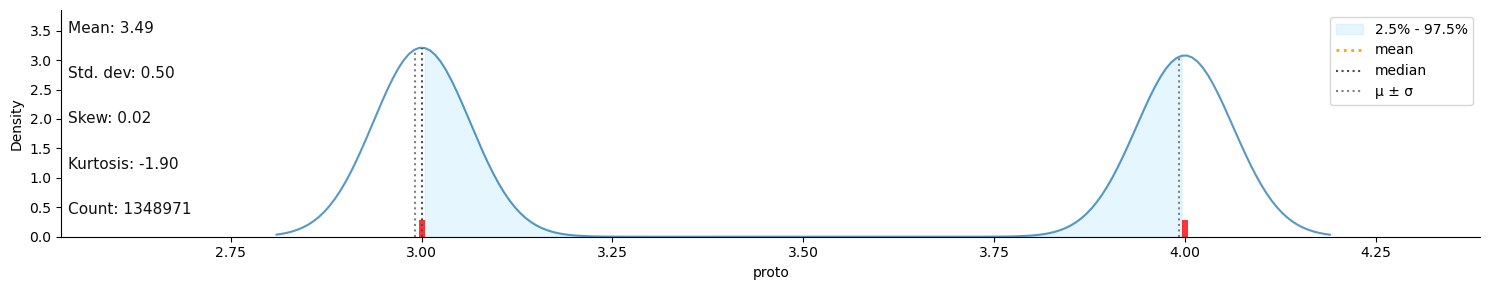

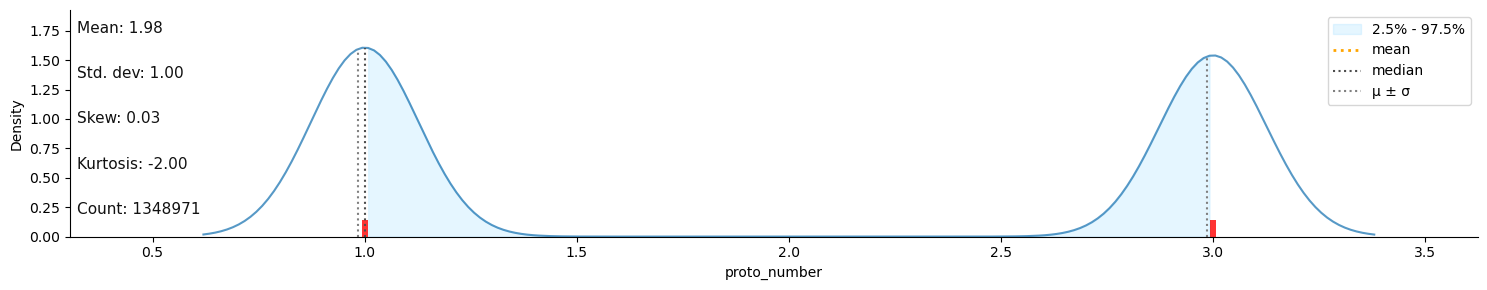

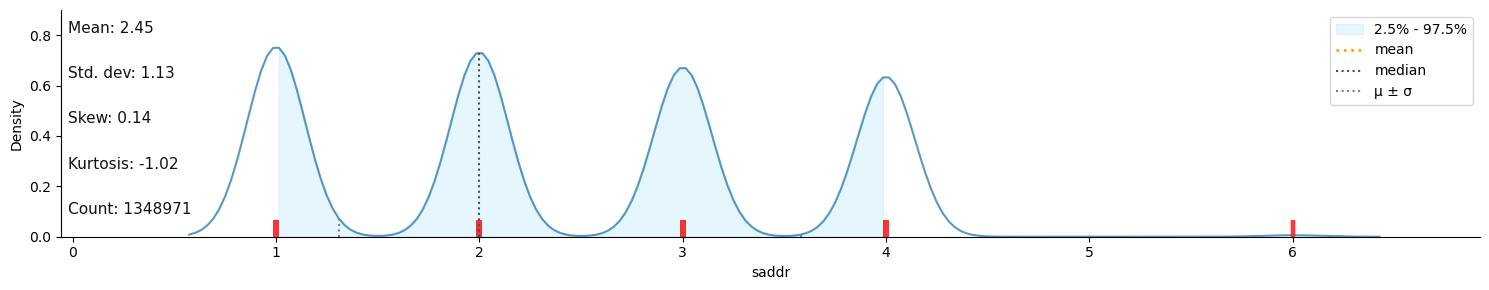

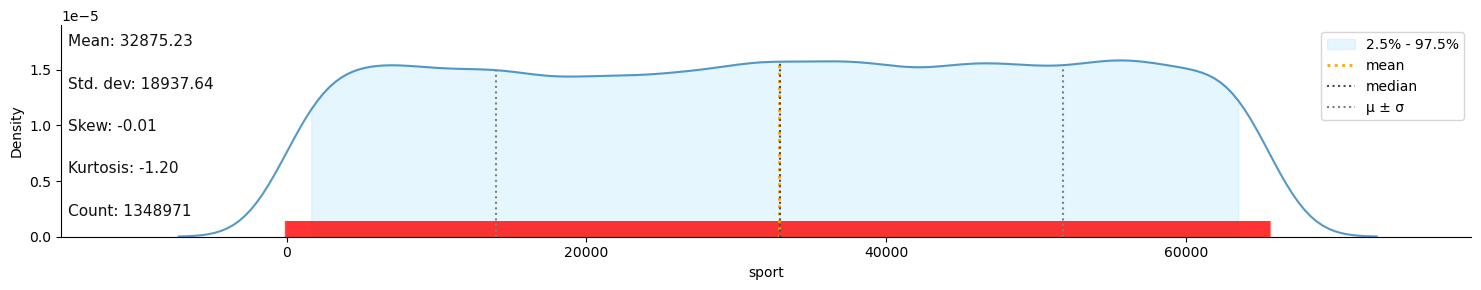

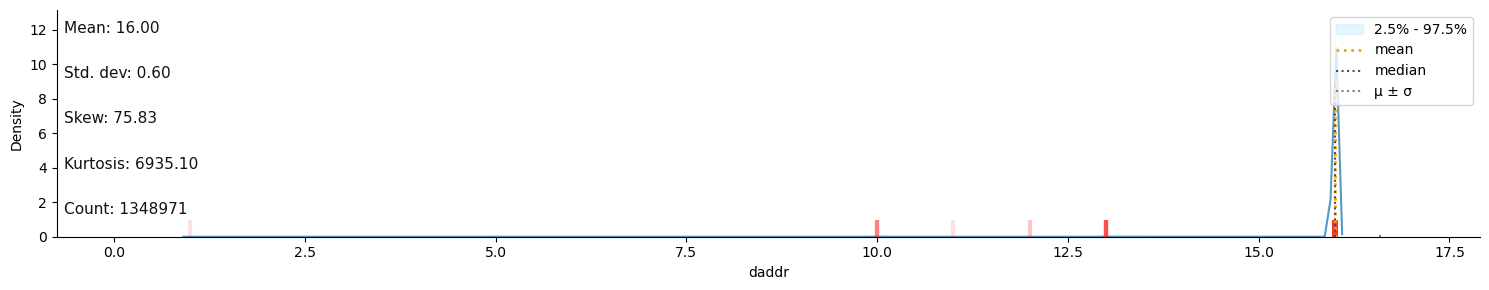

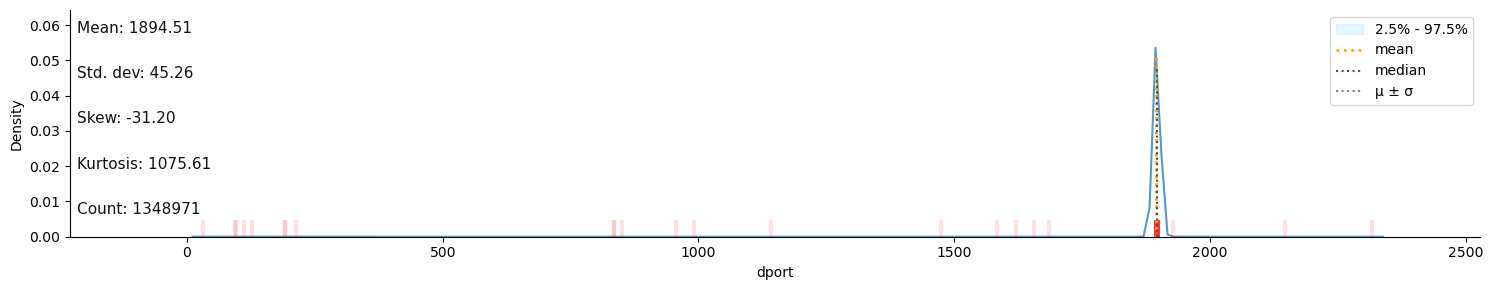

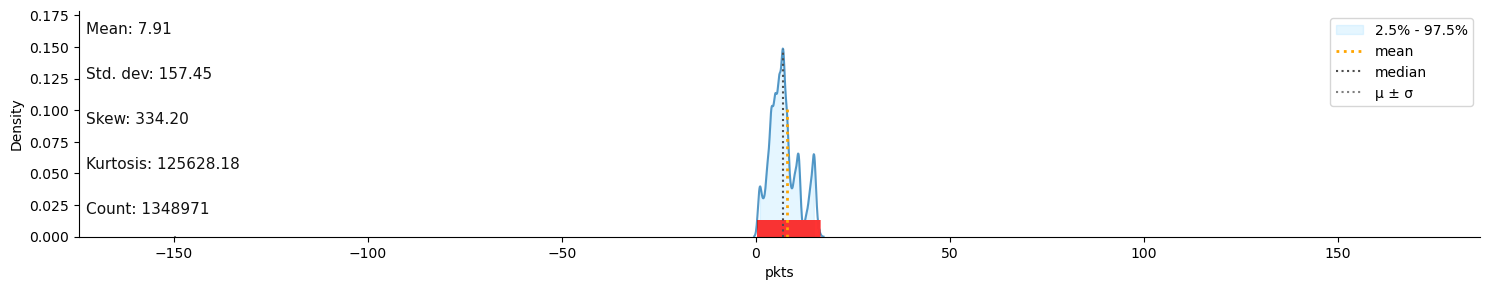

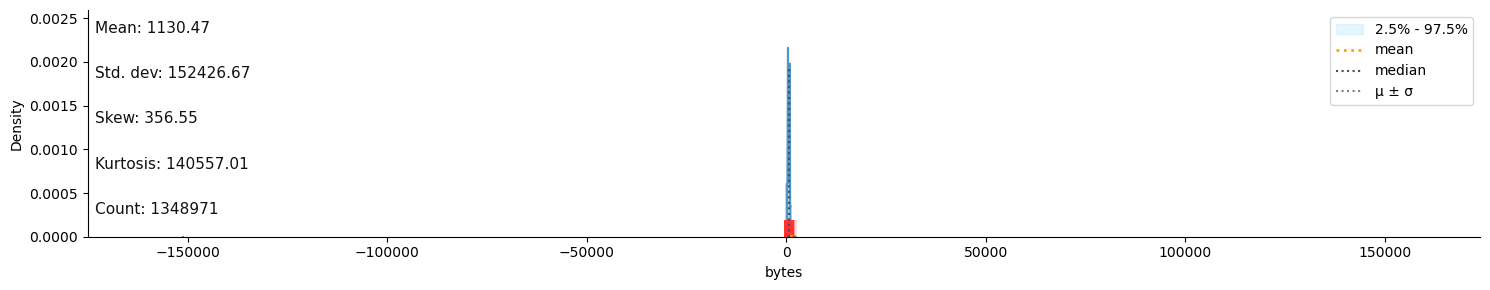

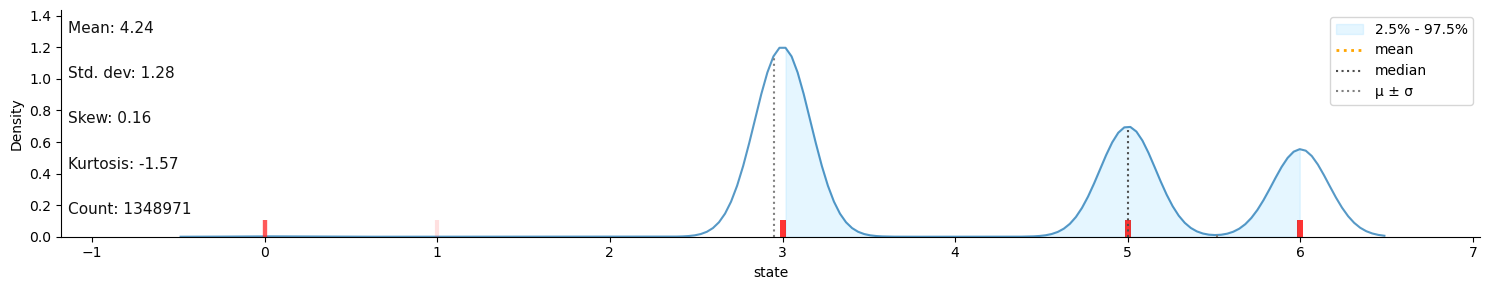

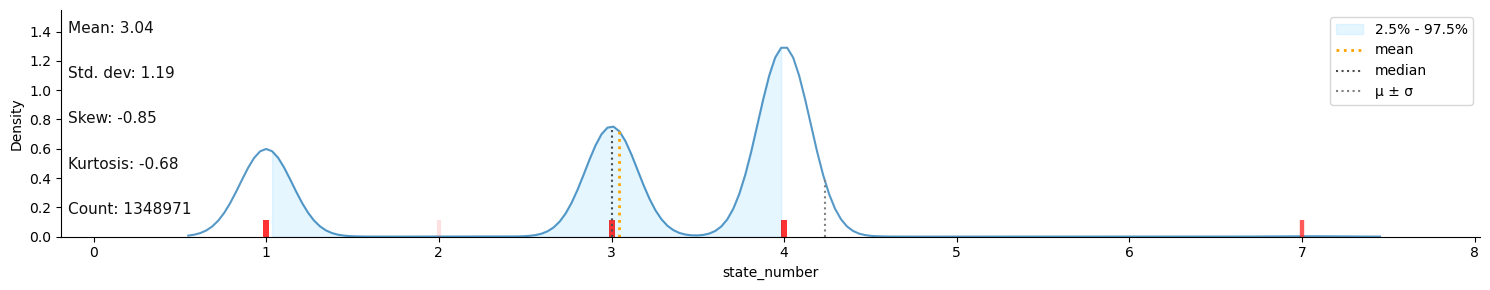

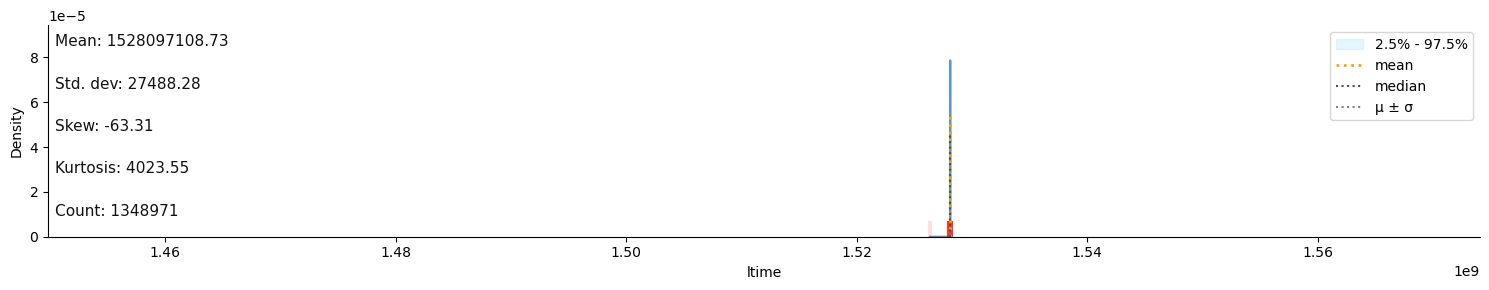

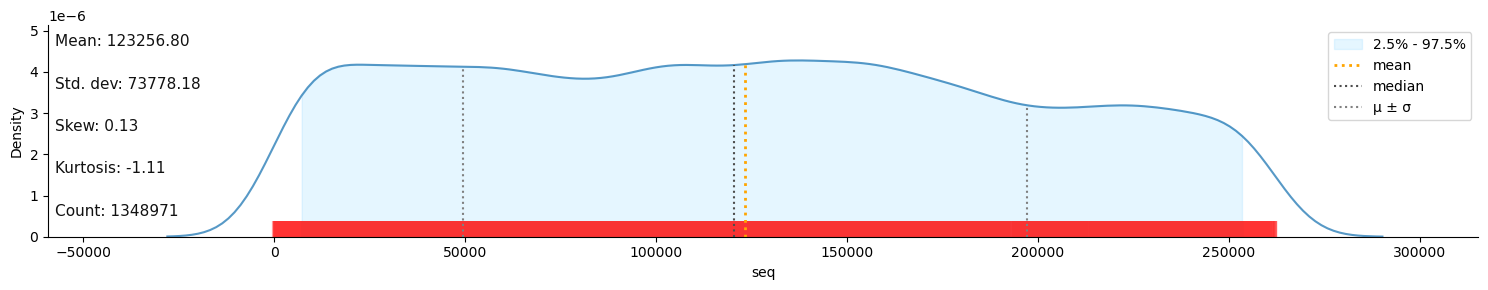

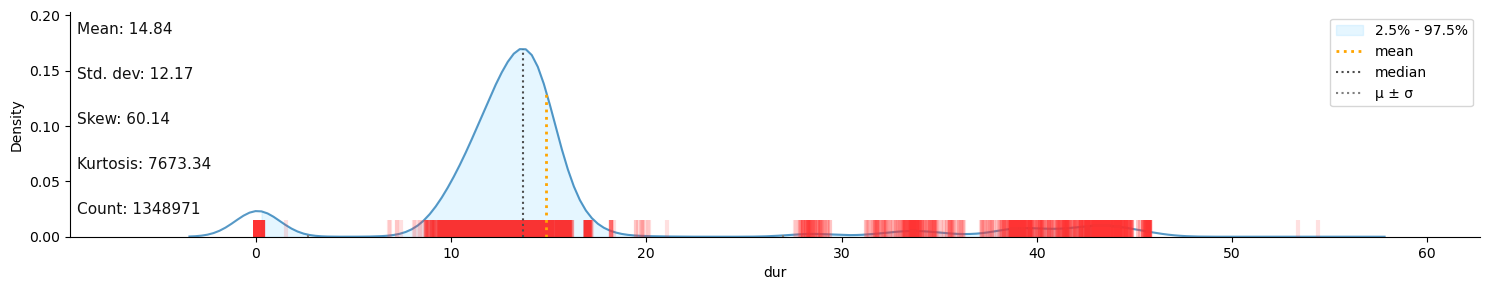

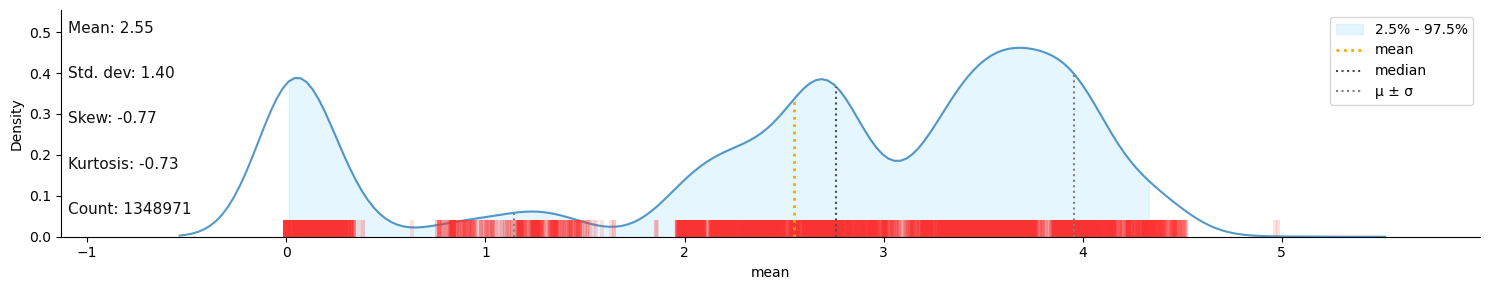

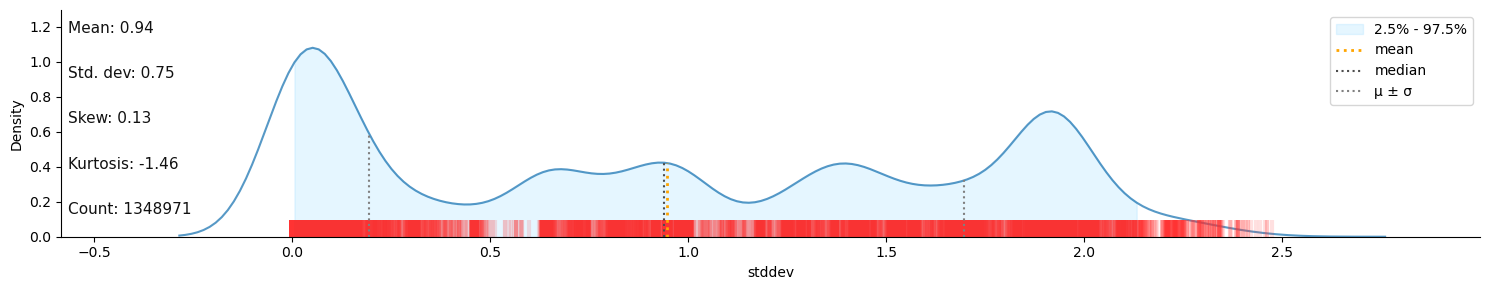

In [15]:
klib.dist_plot(df)  #it  return distribution plot for every feature

In [16]:
X = df.drop(['Unnamed: 0', 'subcategory', 'category'], axis=1) # remove unneccasry col for IV 

y = df['category']   # DV

● You need to apply correlation and variance concepts so that you will take only important columns
into consideration 

In [17]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.6)
selector.fit(X)

useful_columns = X.columns[selector.get_support()]
X_new = X[useful_columns]


In [18]:
X_new   # after applying Threshold 

,pkSeqID,stime,flgs,proto_number,saddr,sport,dport,pkts,bytes,state,...,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP
808103,2458364.0,1.528096e+09,5.0,1.0,2.0,43590.0,1896.0,6.0,736.0,6.0,...,600.0,600.0,0.157517,0.152380,100.0,83.0,0.157517,0.152380,498.0,498.0
836268,2486529.0,1.528096e+09,5.0,1.0,1.0,57974.0,1896.0,3.0,462.0,5.0,...,300.0,300.0,0.089034,0.080677,100.0,40.0,0.089034,0.080677,300.0,120.0
787644,2437905.0,1.528096e+09,5.0,1.0,3.0,19189.0,1896.0,8.0,856.0,6.0,...,912.0,912.0,0.222076,0.222076,100.0,100.0,0.194804,0.222076,912.0,912.0
884846,2535107.0,1.528096e+09,5.0,1.0,2.0,64928.0,1896.0,6.0,736.0,6.0,...,532.0,532.0,0.120694,0.130212,100.0,68.0,0.144923,0.130212,288.0,96.0
14738,1664999.0,1.528096e+09,4.0,1.0,2.0,55214.0,1896.0,6.0,548.0,6.0,...,510.0,510.0,0.612178,0.530834,100.0,61.0,0.612178,0.530834,496.0,366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617408,3267669.0,1.528099e+09,0.0,3.0,1.0,20202.0,1896.0,15.0,900.0,3.0,...,1500.0,1500.0,1.074450,1.074450,100.0,100.0,1.074400,1.074450,1500.0,1500.0
1797508,3447769.0,1.528099e+09,0.0,3.0,2.0,31962.0,1896.0,11.0,660.0,3.0,...,1100.0,1100.0,0.800111,0.800111,100.0,100.0,0.800111,0.800111,1100.0,1100.0
1374094,3024355.0,1.528099e+09,0.0,3.0,1.0,9618.0,1896.0,15.0,900.0,3.0,...,1500.0,1500.0,1.098020,1.098020,100.0,100.0,1.098030,1.098020,1500.0,1500.0
1662645,3312906.0,1.528099e+09,0.0,3.0,2.0,58404.0,1896.0,10.0,600.0,3.0,...,1035.0,1035.0,0.752585,0.752585,100.0,100.0,0.724973,0.752585,1035.0,1035.0


In [19]:
len(X_new.columns)  # we are giving  39 col for corr 

39

In [20]:
# apply Correlation 

In [21]:
corr_matrix=X_new.corr()

In [22]:
corr_matrix

,pkSeqID,stime,flgs,proto_number,saddr,sport,dport,pkts,bytes,state,...,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP
pkSeqID,1.000000,0.029491,-0.623900,0.865706,-0.002398,0.036913,0.014198,0.022187,0.005978,-0.826138,...,0.148380,0.302727,-0.004684,-0.001908,0.006514,0.096283,-0.003196,-0.014272,0.597012,0.535918
stime,0.029491,1.000000,-0.040893,0.053413,-0.034998,-0.000718,0.304579,-0.233762,-0.215063,-0.031404,...,-0.787848,-0.188608,-0.113517,-0.114130,0.548854,0.045138,-0.017995,-0.002323,-0.080500,-0.068135
flgs,-0.623900,-0.040893,1.000000,-0.825610,-0.052916,-0.049501,-0.027487,-0.013439,-0.001974,0.768102,...,-0.094745,-0.201815,-0.008663,-0.005719,-0.030133,-0.063038,-0.005743,-0.012077,-0.463174,-0.409724
proto_number,0.865706,0.053413,-0.825610,1.000000,0.005685,0.018126,0.022636,0.015947,-0.000147,-0.949021,...,0.136236,0.298390,-0.003873,-0.002815,0.025499,0.087445,-0.000252,-0.008226,0.627300,0.557507
saddr,-0.002398,-0.034998,-0.052916,0.005685,1.000000,-0.004947,-0.096764,0.009584,0.016710,-0.021757,...,-0.041666,-0.150108,0.000316,-0.002570,-0.079075,-0.029808,0.000759,0.003337,-0.264040,-0.295173
sport,0.036913,-0.000718,-0.049501,0.018126,-0.004947,1.000000,-0.040432,0.001866,0.002439,-0.019028,...,-0.001218,-0.014067,-0.001703,-0.001299,-0.035473,-0.018640,-0.000338,0.004934,-0.020971,-0.026483
dport,0.014198,0.304579,-0.027487,0.022636,-0.096764,-0.040432,1.000000,-0.016341,-0.012761,-0.026922,...,-0.207496,0.020836,-0.101151,-0.086886,0.515236,0.019141,-0.041751,-0.037475,-0.000422,-0.000960
pkts,0.022187,-0.233762,-0.013439,0.015947,0.009584,0.001866,-0.016341,1.000000,0.985890,-0.021325,...,0.291526,0.787009,0.000610,0.000176,-0.134107,-0.009845,0.001109,0.000712,0.510658,0.461029
bytes,0.005978,-0.215063,-0.001974,-0.000147,0.016710,0.002439,-0.012761,0.985890,1.000000,-0.007180,...,0.261600,0.755206,0.000808,0.000335,-0.123124,-0.010745,0.001124,0.001005,0.472783,0.435309
state,-0.826138,-0.031404,0.768102,-0.949021,-0.021757,-0.019028,-0.026922,-0.021325,-0.007180,1.000000,...,-0.135368,-0.272919,-0.002117,-0.002867,-0.024499,-0.085838,-0.000739,0.004653,-0.562189,-0.498694


In [ ]:
# by using heatmap 

In [23]:
import seaborn as sns

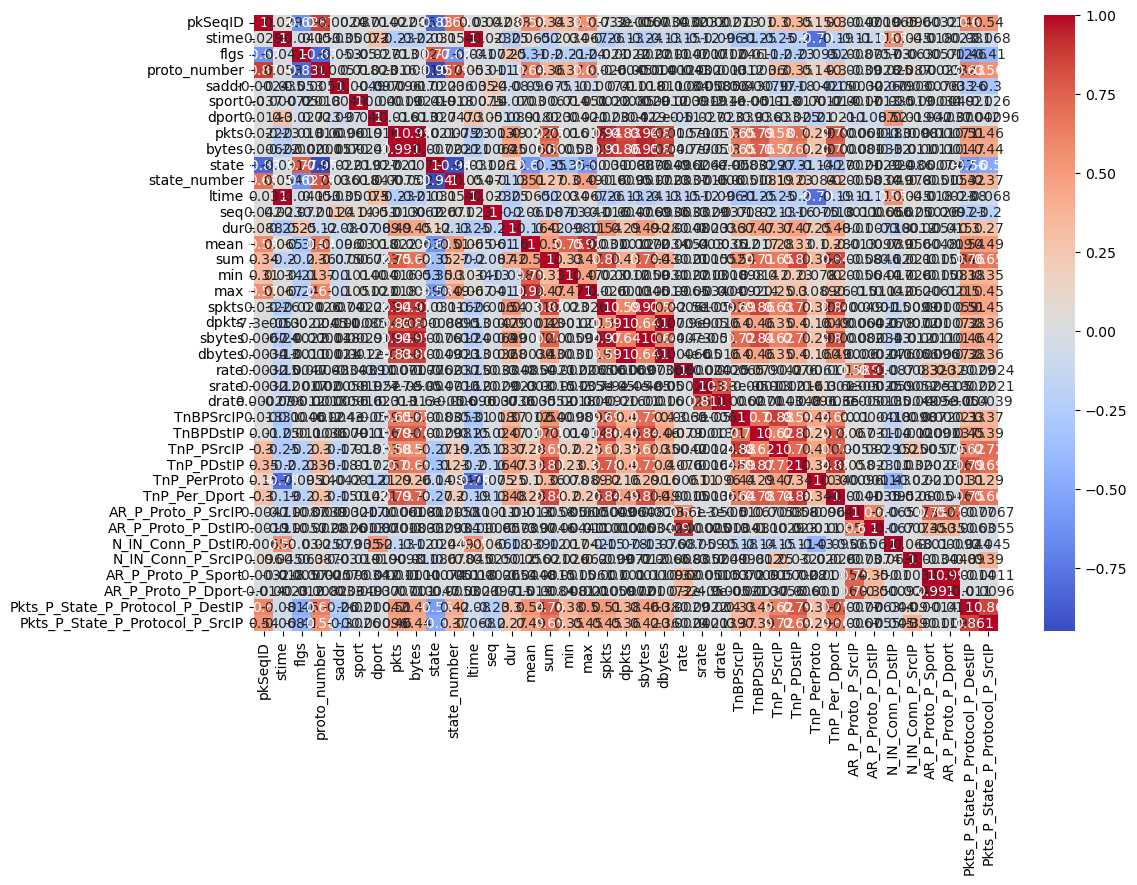

In [24]:
# Create a heatmap using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [26]:
for row in range(len(corr_matrix)):
    for col in range(row):
        if abs(corr_matrix.iloc[row][col]) > 0.6:
            print(corr_matrix.iloc[row][col])
            print(corr_matrix.columns[row])
            

-0.6239002897831674
flgs
0.8657056712651875
proto_number
-0.8256102367146831
proto_number
0.9858898659708395
bytes
-0.8261382412825975
state
0.7681017104463674
state
-0.94902089568215
state
0.690839069304359
state_number
-0.6205085291985651
state_number
0.7908879633077213
state_number
-0.9357739984485812
state_number
0.9999999083035898
ltime
0.6386015369870016
mean
-0.6093277187289776
mean
0.7508561876520956
sum
0.6810928508793823
sum
0.7490167105749516
min
0.6109979457207549
max
0.9181359047125867
max
0.9428650790086125
spkts
0.905837499067188
spkts
0.8234207362836505
spkts
0.827674823983479
dpkts
0.855956893574945
dpkts
0.9428330971577341
sbytes
0.945669912514377
sbytes
0.7428428044806975
sbytes
0.9711769361172304
sbytes
0.6418783663029141
sbytes
0.8270619449111601
dbytes
0.8558524116054372
dbytes
0.9991530859105899
dbytes
0.6411909737445385
dbytes
0.8050515035216861
drate
0.6494862824286649
TnBPSrcIP
0.6516560681122481
TnBPSrcIP
0.6922281598599511
TnBPSrcIP
0.715238429076755
TnBPSrc

In [28]:
#to avoid repetation we use set ()
corr_names = set()
for row in range(len(corr_matrix)):
    for col in range(row):
        if abs(corr_matrix.iloc[row][col]) > 0.6:
            corr_names.add(corr_matrix.columns[row])

In [29]:
corr_names

{'AR_P_Proto_P_Dport',
 'AR_P_Proto_P_DstIP',
 'AR_P_Proto_P_Sport',
 'Pkts_P_State_P_Protocol_P_DestIP',
 'Pkts_P_State_P_Protocol_P_SrcIP',
 'TnBPDstIP',
 'TnBPSrcIP',
 'TnP_PDstIP',
 'TnP_PSrcIP',
 'TnP_PerProto',
 'TnP_Per_Dport',
 'bytes',
 'dbytes',
 'dpkts',
 'drate',
 'flgs',
 'ltime',
 'max',
 'mean',
 'min',
 'proto_number',
 'sbytes',
 'spkts',
 'state',
 'state_number',
 'sum'}

In [30]:
df.drop(corr_names,axis = 1, inplace=True) # removing of unwanted col

In [31]:
df

,Unnamed: 0,pkSeqID,stime,flgs_number,proto,saddr,sport,daddr,dport,pkts,...,dur,stddev,rate,srate,AR_P_Proto_P_SrcIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,attack,category,subcategory
808103,2458365.0,2458364.0,1.528096e+09,2.0,3.0,2.0,43590.0,16.0,1896.0,6.0,...,38.091141,1.107218,0.131264,0.105011,0.157517,100.0,83.0,1.0,0.0,2.0
836268,2486530.0,2486529.0,1.528096e+09,2.0,3.0,1.0,57974.0,16.0,1896.0,3.0,...,33.695160,1.241224,0.059356,0.059356,0.089034,100.0,40.0,1.0,0.0,2.0
787644,2437906.0,2437905.0,1.528096e+09,2.0,3.0,3.0,19189.0,16.0,1896.0,8.0,...,41.066936,0.114313,0.170453,0.121752,0.222076,100.0,100.0,1.0,0.0,2.0
884846,2535108.0,2535107.0,1.528096e+09,2.0,3.0,2.0,64928.0,16.0,1896.0,6.0,...,41.401173,1.461264,0.120770,0.096616,0.120694,100.0,68.0,1.0,0.0,2.0
14738,1664999.0,1664999.0,1.528096e+09,5.0,3.0,2.0,55214.0,16.0,1896.0,6.0,...,9.801076,0.049341,0.510148,0.306089,0.612178,100.0,61.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617408,3267671.0,3267669.0,1.528099e+09,1.0,4.0,1.0,20202.0,16.0,1896.0,15.0,...,13.961278,0.823095,1.002774,1.002774,1.074450,100.0,100.0,1.0,0.0,3.0
1797508,3447771.0,3447769.0,1.528099e+09,1.0,4.0,2.0,31962.0,16.0,1896.0,11.0,...,13.748093,0.632131,0.727374,0.727374,0.800111,100.0,100.0,1.0,0.0,3.0
1374094,3024357.0,3024355.0,1.528099e+09,1.0,4.0,1.0,9618.0,16.0,1896.0,15.0,...,13.660802,1.366526,1.024830,1.024830,1.098020,100.0,100.0,1.0,0.0,3.0
1662645,3312908.0,3312906.0,1.528099e+09,1.0,4.0,2.0,58404.0,16.0,1896.0,10.0,...,13.793611,0.665194,0.652476,0.652476,0.752585,100.0,100.0,1.0,0.0,3.0


In [32]:
df.drop(['Unnamed: 0', 'subcategory'], axis=1,inplace=True)
# y = df['category']

In [33]:
df.drop(["category"] ,axis= 1)

,pkSeqID,stime,flgs_number,proto,saddr,sport,daddr,dport,pkts,seq,dur,stddev,rate,srate,AR_P_Proto_P_SrcIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,attack
808103,2458364.0,1.528096e+09,2.0,3.0,2.0,43590.0,16.0,1896.0,6.0,20676.0,38.091141,1.107218,0.131264,0.105011,0.157517,100.0,83.0,1.0
836268,2486529.0,1.528096e+09,2.0,3.0,1.0,57974.0,16.0,1896.0,3.0,48841.0,33.695160,1.241224,0.059356,0.059356,0.089034,100.0,40.0,1.0
787644,2437905.0,1.528096e+09,2.0,3.0,3.0,19189.0,16.0,1896.0,8.0,210.0,41.066936,0.114313,0.170453,0.121752,0.222076,100.0,100.0,1.0
884846,2535107.0,1.528096e+09,2.0,3.0,2.0,64928.0,16.0,1896.0,6.0,97420.0,41.401173,1.461264,0.120770,0.096616,0.120694,100.0,68.0,1.0
14738,1664999.0,1.528096e+09,5.0,3.0,2.0,55214.0,16.0,1896.0,6.0,13758.0,9.801076,0.049341,0.510148,0.306089,0.612178,100.0,61.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617408,3267669.0,1.528099e+09,1.0,4.0,1.0,20202.0,16.0,1896.0,15.0,114741.0,13.961278,0.823095,1.002774,1.002774,1.074450,100.0,100.0,1.0
1797508,3447769.0,1.528099e+09,1.0,4.0,2.0,31962.0,16.0,1896.0,11.0,32688.0,13.748093,0.632131,0.727374,0.727374,0.800111,100.0,100.0,1.0
1374094,3024355.0,1.528099e+09,1.0,4.0,1.0,9618.0,16.0,1896.0,15.0,133577.0,13.660802,1.366526,1.024830,1.024830,1.098020,100.0,100.0,1.0
1662645,3312906.0,1.528099e+09,1.0,4.0,2.0,58404.0,16.0,1896.0,10.0,159978.0,13.793611,0.665194,0.652476,0.652476,0.752585,100.0,100.0,1.0


● Use this data for modeling 
o Create 
Logistic regression 
Random Forest 
Decision Tree 
Note : Accuracy should be above 90%

In [34]:
#split the data into train test split
from sklearn.model_selection import train_test_split 
#get accuracy 
from sklearn.metrics import accuracy_score
#get the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [35]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=50) 

In [36]:
#create opbject of model 
logR = LogisticRegression()
logR.fit(x_train,y_train)
ypred = logR.predict(x_test)
accuracy_score(y_test,ypred)

C:\Users\Jayraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9997813154432069

In [37]:
#create opbject of model 
cls = RandomForestClassifier(criterion='entropy', n_estimators = 150)
cls.fit(x_train,y_train)
ypred=cls.predict(x_test)

In [38]:
acc=accuracy_score(ypred,y_test)
print(f"accuracy score for RandomForest is {acc}" )

accuracy score for RandomForest is 1.0


In [39]:
#create opbject of model 
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
ypred = dt.predict(x_test)
acc=accuracy_score(ypred,y_test)

In [40]:
acc=accuracy_score(ypred,y_test)
print(f"accuracy score for DecisionTree is {acc}" )

accuracy score for DecisionTree is 1.0


In [ ]:
# by using minimum less corr 

In [44]:
corr_names1 = set()
for row in range(len(corr_matrix)):
    for col in range(row):
        if abs(corr_matrix.iloc[row][col]) > 0.4:
            corr_names1.add(corr_matrix.columns[row])

In [46]:
len(corr_names1)

29

In [48]:
corr_names2 = set()
for row in range(len(corr_matrix)):
    for col in range(row):
        if abs(corr_matrix.iloc[row][col]) > 0.2:
            corr_names2.add(corr_matrix.columns[row])

In [50]:
len(corr_names2)

33